**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from google.colab import files

**LOADING THE DATA & PREPROCESSING THE DATA**

In [ ]:
uploaded=files.upload()
calories_data = pd.read_csv("calories.csv")

Saving calories.csv to calories.csv


In [ ]:
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
uploaded=files.upload()
exercise_data = pd.read_csv("exercise.csv")

Saving exercise.csv to exercise.csv


In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


**Inference:**

* We can observe an Indirect relationship between heart rate & body temperature with respect to the excercise the individual does.

**COMBINING THE EXCERCISE DATA & CALORIES DATA**

In [ ]:
combined_data = pd.concat([exercise_data,calories_data['Calories']], axis=1)

In [ ]:
combined_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
#checking the number of rows & columns
combined_data.shape

(15000, 9)

**Hence our combined_data has 15,000 people with 9 different features**

In [ ]:
#getting the information about the data most importantly to know about any missing values
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
#checking the missing values
combined_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

**ANALYSING THE DATA**

In [ ]:
#To get stastical measures about the data
combined_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


**Important inference**
* Heart rate & body temperature is more when the person is doing excercise

**VISUALIZATION OF DATA**

In [ ]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


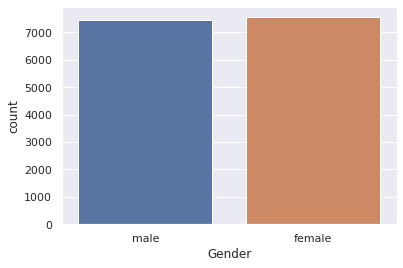

In [ ]:
#inorder to find the distribution of males & females
#plotting the gender column in count plot
sns.countplot(combined_data['Gender'])

**From the above plot, we can observe that the data is evenly distributed(almost 7000) for both males and females.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


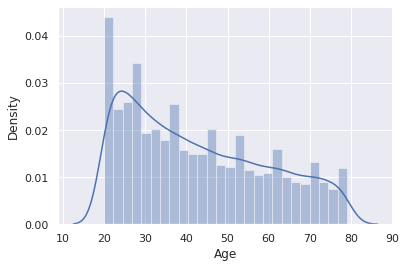

In [ ]:
#inorder to find the distribution of age column
sns.distplot(combined_data['Age'])

**From the above plot, we can observe that the Age column has the mean value of 42 and the data is positively skewed & most of the datapoints are in between 20 to 50.**
    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


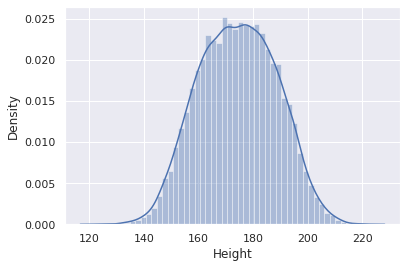

In [ ]:
#inorder to find the distribution of height column
sns.distplot(combined_data['Height'])

**Hence,from the above plot we can observe that the height data is normally distributed with mean of 174cm.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


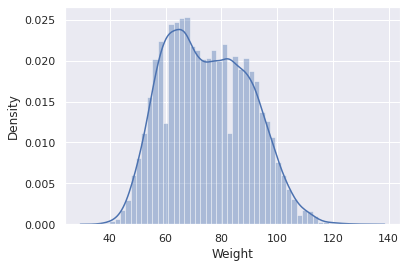

In [ ]:
#inorder to find the distribution of weight column
sns.distplot(combined_data['Weight'])

**Hence,from the above plot we can observe that the weight data is also normally distributed with mean of 74 kg**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


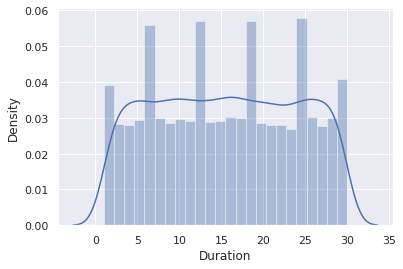

In [ ]:
sns.distplot(combined_data['Duration'])

**Hence, from the above plot we can observe that the duration data is a low peaked data with mean of 15mins**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


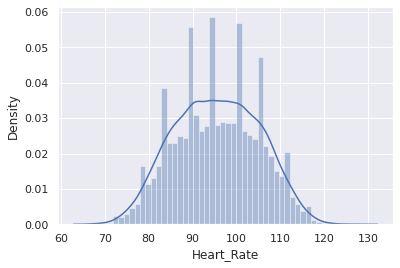

In [ ]:
sns.distplot(combined_data['Heart_Rate'])

**Hence,from the above plot we can observe that the heart rate column is normally distributed with mean of 95 heart beats with several outliers.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


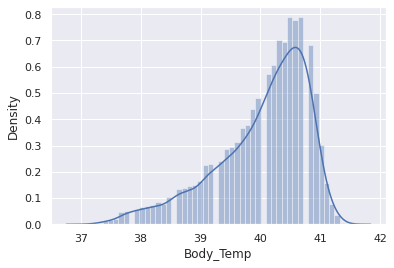

In [ ]:
sns.distplot(combined_data['Body_Temp'])

**Hence,from the above plot we can observe that the temperature column is negatively skewed with mean of 40.**

**TO FIND THE CORRELATION IN THE DATA**

Duration & calories are directly proportional=positively correlated


In [ ]:
correlation = combined_data.corr()
correlation

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


**Construction of heat map for the understanding of correlation**

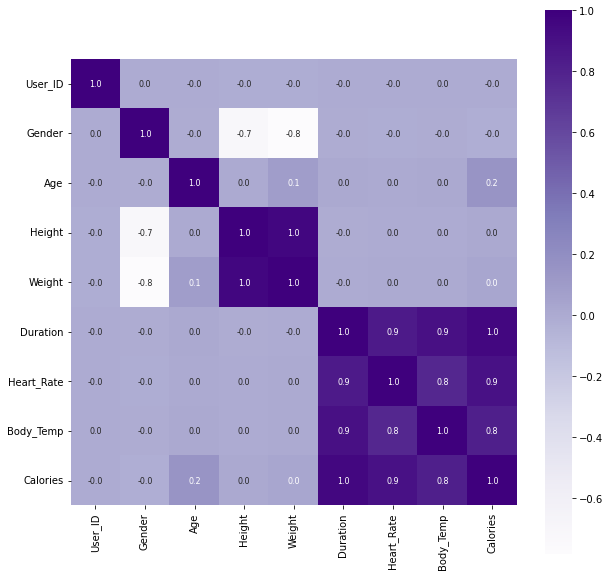

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

**CONVERSION OF TEXT DATA TO NUMERICAL VALUES**

In [ ]:
combined_data.replace({'Gender':{'male':0,'female':1}},inplace=True)
combined_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


**SEPARATION OF FEATURES AND TARGET**

In [ ]:
X=combined_data.drop(['User_ID','Calories'],axis=1)
Y=combined_data['Calories']

In [ ]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


**SPLIT THE DATA INTO TRAINING DATA & TEST DATA**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X.values,Y.values,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Hence, we can observe that 
* X contains the orignal amount of data which is 15000
* X_train contains 80% of the data which is 12000
* X_test contains 20% of the data which is 3000

**MODEL IMPLEMENTATION : XGBoost Regressor**

In [ ]:
#loading the model
model = XGBRegressor()

In [ ]:
#training the model with X_train
model.fit(X_train,Y_train)

[05:54:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

**EVALUATION**

Evaluation is done by test data

**PREDICTION OF THE DATA**

In [ ]:
calories_burnt_prediction = model.predict(X_test)

In [ ]:
print(calories_burnt_prediction)


[129.06204  223.79721   39.181965 ... 145.59767   22.53474   92.29064 ]


**MEAN ABSOLUTE ERROR**

In [ ]:
MAE = metrics.mean_absolute_error(Y_test, calories_burnt_prediction)

In [ ]:
print("Mean Absolute Error = ",MAE)

Mean Absolute Error =  2.7159012502233186


**BUILDING A PREDICTIVE SYSTEM**
* Building a predictive system inorder to find the calories burnt for the first individual from the dataset

In [ ]:
import numpy as np
input_data = [1,31,148.0,50.0,8.0,84.0,39.5]

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)


[31.50148]


In [ ]:
print("Thus we have successfully predicted the calories burnt using XGBoost")

Thus we have successfully predicted the calories burnt using XGBoost


To perform for Linear Regression

**INTERESTING FACTS**

**STAY SAFE**🏡

**STAY HEALTHY**👩

For linear regression


In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
training_data_prediction=reg.predict(X_train)

In [ ]:
MAE_linear_reg_train_data=metrics.mean_absolute_error(Y_train,training_data_prediction)
MAE_linear_reg_train_data

8.332985229896682

In [ ]:
test_data_prediction=reg.predict(X_test)
print(test_data_prediction)

[137.49241057 182.18166512  50.15864741 ... 157.56637167  16.54924422
 100.21047087]


In [ ]:
MAE_linear_reg_test_data=metrics.mean_absolute_error(Y_test,test_data_prediction)
MAE_linear_reg_test_data

8.385188053147118

In [ ]:
import numpy as np
input_data = (0,68,190,94,29,105,40.8)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = reg.predict(input_data_reshaped)
print(prediction[0])

199.38038662883463


Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=300, max_depth=13, random_state=2)
forest_model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=13, n_estimators=300, random_state=2)

In [ ]:
forest_prediction=forest_model.predict(X_test)
forest_prediction
MAE_forest=metrics.mean_absolute_error(Y_test,forest_prediction)
MAE_forest


1.7144347914025686

In [ ]:

input_data = [1,31,148.0,50.0,8.0,84.0,39.5]

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = forest_model.predict(input_data_reshaped)
print(prediction[0])

31.568582354682356
